
# Trabajo práctico

# **Aprendizaje Automático I**

### Tema: Predicción de lluvia en Australia.

## Integrantes:

    
*   Kidonakis, Sol
*   Leguiza, Claudia E





# Dataset

El dataset **weatherAUS.csv** contiene infomacion del clima de diferentes ciudades de Australia recopilada durante el periodo 2008 - 2017.

Contiene un total de 145412 observaciones y las siguientes columnas:



0.   Date:   fecha de la observacion
1.   Location
2.   MinTemp
3.   MaxTemp
4.   Rainfall
5.   Evapooration
6.   Sunshine
7.   WindGustDir
8.   WindGustSpeed
9.   WindDir9am:
10.  WindDir3pm:
11.  WindSpeed9am:
12.  WindSpeed3pm:
13.  Humidity9am:
14.  Humidity3pm:
15.  Pressure9am:
16.  Pressure3pm:
17.  Cloud9am:
18.  Cloud3pm:
19.  Temp9am:
20.  Temp3pm:
21.  RainToday:
22.  RainTomorrow:
23.  Rainfall Tomorrow
  




# Objetivo:

  Predecir las target **RainTomorrow** y **RainfallTomorrow** en las ciudades de Adelaide, Canberra, Cobar, Dartmoor, Melbourne, MelbourneAirport, MountGambier, Sydney y SydneyAirport

In [456]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

#from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.simplefilter('ignore')



# Carga de datos

In [457]:
datos = pd.read_csv('/content/weatherAUS.csv', delimiter = ",")


In [458]:
datos.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


In [459]:
datos['Location'].unique()


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [460]:
datos['Location'].count()

145412

Buscamos los registros correspondientes a las localidades en estudio.
Creamos un dataset nuevo con ellas.

A fin de completar los datos nulos las tomaremos como una sola region.


In [461]:
datos['Location'].isin(( 'Sydney','SydneyAirport','Melbourne', 'MelbourneAirport','Canberra',\
                       'Adelaide', 'MountGambier','Cobar', 'Dartmoor' )).value_counts()

Location
False    117179
True      28233
Name: count, dtype: int64

In [462]:
data = datos[datos.Location\
                      .isin(( 'Sydney','SydneyAirport','Melbourne', 'MelbourneAirport',\
                             'Canberra','Adelaide', 'MountGambier','Cobar', 'Dartmoor' ))]

In [463]:
data


,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
6047,6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,0.0
6048,6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,0.0
6049,6051,2009-01-03,Cobar,15.5,34.1,0.0,12.6,13.3,SE,30.0,...,7.0,NaN,1011.6,NaN,1.0,NaN,32.7,No,No,0.0
6050,6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,0.0
6051,6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,102547,2017-06-20,MountGambier,6.2,16.3,0.0,NaN,NaN,N,41.0,...,70.0,1026.3,1024.1,NaN,NaN,8.7,15.5,No,Yes,2.0
102516,102548,2017-06-21,MountGambier,8.7,13.2,2.0,NaN,NaN,S,20.0,...,82.0,1029.2,1028.3,NaN,8.0,11.1,12.0,Yes,No,0.0
102517,102549,2017-06-22,MountGambier,7.0,15.7,0.0,NaN,NaN,N,31.0,...,67.0,1027.0,1022.4,8.0,NaN,10.0,14.9,No,No,0.0
102518,102550,2017-06-23,MountGambier,5.4,16.2,0.0,NaN,NaN,N,37.0,...,70.0,1017.0,1014.4,8.0,4.0,6.4,14.9,No,Yes,2.2


## Particion de conjuntos de entrenamiento, validacion y prueba

Verificamos si el dataset esta balanceado antes de realizar la particion

In [464]:
valores = data['Location'].value_counts()

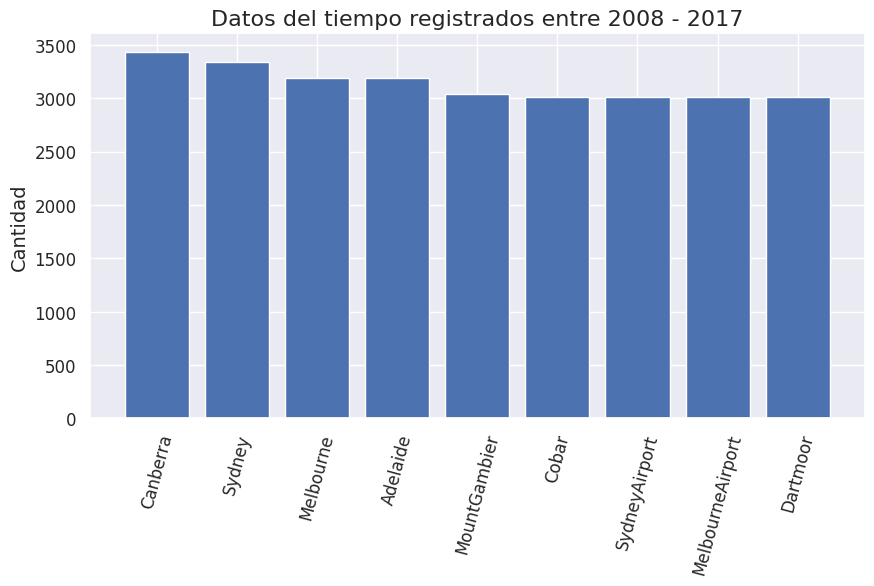

In [465]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=75, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Cantidad', fontsize=14)
plt.title('Datos del tiempo registrados entre 2008 - 2017',
          fontsize=16)
plt.bar(valores.index, valores)
plt.show()

El dataset esta desbalanceado por lo que aplicamos un truncamiento  utilizando como referencia la fecha de aparicion en el dataset de las ciudades con menores observaciones.

In [466]:
df= data.copy()

In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28233 entries, 6047 to 102519
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        28233 non-null  int64  
 1   Date              28233 non-null  object 
 2   Location          28233 non-null  object 
 3   MinTemp           27663 non-null  float64
 4   MaxTemp           27675 non-null  float64
 5   Rainfall          27247 non-null  float64
 6   Evaporation       23880 non-null  float64
 7   Sunshine          21520 non-null  float64
 8   WindGustDir       26588 non-null  object 
 9   WindGustSpeed     26591 non-null  float64
 10  WindDir9am        26585 non-null  object 
 11  WindDir3pm        27796 non-null  object 
 12  WindSpeed9am      27875 non-null  float64
 13  WindSpeed3pm      27893 non-null  float64
 14  Humidity9am       27293 non-null  float64
 15  Humidity3pm       27343 non-null  float64
 16  Pressure9am       27394 non-null  float64

In [468]:
df = df.sort_values(["Date"])
fecha_especifica = '2009-01-01'
df_filtrado = df[df['Date'] >= fecha_especifica]

df_filtrado.reset_index(drop = True, inplace = True)#Resetea el indice y no  crea uno  nuevo
df_filtrado

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,99544,2009-01-01,MountGambier,12.6,17.0,0.8,4.8,6.5,SW,56.0,...,43.0,1008.3,1011.6,7.0,5.0,14.3,16.6,No,No,0.0
1,96504,2009-01-01,Adelaide,16.9,22.9,0.0,NaN,10.9,SW,50.0,...,40.0,1011.3,1012.4,NaN,NaN,18.1,22.5,No,No,0.0
2,30511,2009-01-01,Sydney,18.4,34.7,0.0,9.8,12.9,NaN,NaN,...,22.0,1005.5,1000.7,4.0,6.0,22.0,34.3,No,No,0.0
3,80998,2009-01-01,Dartmoor,NaN,NaN,NaN,4.8,6.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33520,2009-01-01,SydneyAirport,17.7,35.1,0.0,9.8,12.9,S,72.0,...,13.0,1005.3,1000.2,6.0,6.0,22.9,34.0,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27067,49021,2017-06-24,Canberra,0.1,14.4,0.0,NaN,NaN,NW,48.0,...,45.0,1017.5,1016.2,NaN,NaN,9.1,13.0,No,No,0.0
27068,84005,2017-06-24,Dartmoor,6.2,11.8,3.0,NaN,NaN,W,20.0,...,70.0,1019.8,1017.8,NaN,NaN,6.9,10.9,Yes,No,0.2
27069,9056,2017-06-24,Cobar,8.3,16.2,0.0,NaN,NaN,WSW,20.0,...,49.0,1020.2,1018.5,NaN,7.0,14.2,14.5,No,No,0.0
27070,99511,2017-06-24,Adelaide,5.0,17.3,0.0,NaN,NaN,W,17.0,...,54.0,1020.7,1018.5,NaN,NaN,9.6,16.7,No,No,0.0


In [469]:
df_filtrado['Location'].value_counts()

Location
MountGambier        3008
Adelaide            3008
Sydney              3008
Dartmoor            3008
SydneyAirport       3008
Cobar               3008
Melbourne           3008
Canberra            3008
MelbourneAirport    3008
Name: count, dtype: int64

In [470]:
df_filtrado = df_filtrado.drop('Unnamed: 0', axis =1)

Vamos a destinar el 80% de los datos a training y 20% a test

In [471]:
df_train  = df_filtrado.iloc[:21657]
df_train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,2009-01-01,MountGambier,12.6,17.0,0.8,4.8,6.5,SW,56.0,SW,...,43.0,1008.3,1011.6,7.0,5.0,14.3,16.6,No,No,0.0
1,2009-01-01,Adelaide,16.9,22.9,0.0,NaN,10.9,SW,50.0,SW,...,40.0,1011.3,1012.4,NaN,NaN,18.1,22.5,No,No,0.0
2,2009-01-01,Sydney,18.4,34.7,0.0,9.8,12.9,NaN,NaN,W,...,22.0,1005.5,1000.7,4.0,6.0,22.0,34.3,No,No,0.0
3,2009-01-01,Dartmoor,NaN,NaN,NaN,4.8,6.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,SydneyAirport,17.7,35.1,0.0,9.8,12.9,S,72.0,NW,...,13.0,1005.3,1000.2,6.0,6.0,22.9,34.0,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21652,2015-10-31,Adelaide,15.0,28.0,0.0,NaN,NaN,SW,22.0,NNW,...,22.0,1013.7,1010.7,NaN,NaN,18.3,26.7,No,No,0.4
21653,2015-10-31,Dartmoor,12.8,27.7,3.8,3.6,12.0,ENE,43.0,ENE,...,34.0,1011.4,1008.5,NaN,NaN,19.5,26.8,Yes,No,0.0
21654,2015-11-01,Canberra,8.9,25.3,2.2,NaN,NaN,W,57.0,NW,...,60.0,1015.7,1010.7,NaN,8.0,18.1,20.8,Yes,Yes,19.4
21655,2015-11-01,SydneyAirport,17.5,28.7,0.0,7.8,9.0,N,56.0,NNE,...,54.0,1015.0,1010.1,1.0,3.0,22.4,26.7,No,Yes,9.8


In [472]:
df_test = df_filtrado.iloc[21657:]
df_test

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
21657,2015-11-01,Adelaide,15.5,25.2,0.4,NaN,NaN,WSW,28.0,NaN,...,21.0,1010.3,1009.7,NaN,NaN,18.5,24.1,No,No,0.0
21658,2015-11-01,MelbourneAirport,15.0,27.0,4.8,7.0,5.2,N,72.0,N,...,59.0,1008.3,1006.7,4.0,7.0,21.2,21.0,Yes,No,0.2
21659,2015-11-01,Cobar,16.7,30.2,2.4,7.2,NaN,W,65.0,NE,...,45.0,1012.9,1008.3,6.0,6.0,21.6,28.2,Yes,Yes,7.6
21660,2015-11-01,MountGambier,12.0,18.3,0.0,6.6,1.8,WNW,37.0,WNW,...,77.0,1010.7,1009.0,8.0,7.0,14.9,15.3,No,Yes,2.6
21661,2015-11-01,Sydney,17.5,26.8,0.0,7.8,9.0,NE,44.0,E,...,59.0,1015.2,1010.6,1.0,3.0,21.9,25.4,No,Yes,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27067,2017-06-24,Canberra,0.1,14.4,0.0,NaN,NaN,NW,48.0,N,...,45.0,1017.5,1016.2,NaN,NaN,9.1,13.0,No,No,0.0
27068,2017-06-24,Dartmoor,6.2,11.8,3.0,NaN,NaN,W,20.0,NW,...,70.0,1019.8,1017.8,NaN,NaN,6.9,10.9,Yes,No,0.2
27069,2017-06-24,Cobar,8.3,16.2,0.0,NaN,NaN,WSW,20.0,W,...,49.0,1020.2,1018.5,NaN,7.0,14.2,14.5,No,No,0.0
27070,2017-06-24,Adelaide,5.0,17.3,0.0,NaN,NaN,W,17.0,NaN,...,54.0,1020.7,1018.5,NaN,NaN,9.6,16.7,No,No,0.0


### Funciones

In [473]:
def preprocesamiento(data):
    data.info()
    data.isna().sum()

    # Definir columnas con valores nulos
    columnas_con_nulos = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                          'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm','Humidity9am',
                          'Humidity3pm', 'Pressure9am','Pressure3pm', 'Cloud9am',
                          'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainfallTomorrow']

    # Rellenar valores faltantes en 'RainToday' y 'RainTomorrow'
    data['RainToday'] = data.groupby('Date')['RainToday'].transform(lambda x: x.fillna(x.mode().iloc[0]))
    data['RainTomorrow'] = data.groupby('Date')['RainTomorrow'].transform(lambda x: x.fillna(x.mode().iloc[0]))

    # Rellenar valores faltantes en direcciones del viento
    data['WindGustDir'] = data.groupby('Date')['WindGustDir'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.isna().all() else x)
    data['WindDir9am'] = data.groupby('Date')['WindDir9am'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.isna().all() else x)
    data['WindDir3pm'] = data.groupby('Date')['WindDir3pm'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.isna().all() else x)

    # Rellenar valores faltantes con la media por día para las columnas especificadas
    media_por_dia = data.groupby('Date')[columnas_con_nulos].transform('mean')
    data[columnas_con_nulos] = data[columnas_con_nulos].fillna(media_por_dia)

    data['Date'] = pd.to_datetime(data['Date'])

    return data



In [474]:
def asignar_estacion(fecha):
    mes = fecha.month
    if mes in [12, 1, 2]:  # Verano: Diciembre, Enero, Febrero
        return 'Summer'
    elif mes in [3, 4, 5]:  # Otoño: Marzo, Abril, Mayo
        return 'Autumn'
    elif mes in [6, 7, 8]:  # Invierno: Junio, Julio, Agosto
        return 'Winter'
    else:  # Primavera: Septiembre, Octubre, Noviembre
        return 'Spring'

In [475]:
def codificar_variables(data):

  data1 = data.copy()

  for var in ["SW", "S", 'SSW', 'W', 'SSE', 'E', 'SE', 'NE', 'NNE', 'WSW', 'WNW',
            'NW', 'N', 'ESE', 'ENE']:
    # Crear columnas para WindGustDir
    data1[f'WindGustDir_{var}'] = 0
    data1.loc[data['WindGustDir'] == var, f'WindGustDir_{var}'] = 1

    # Crear columnas para WindGust9am
    data1[f'WindDir9am_{var}'] = 0
    data1.loc[data['WindDir9am'] == var, f'WindDir9am_{var}'] = 1

    # Crear columnas para WindGust3pm
    data1[f'WindDir3pm_{var}'] = 0
    data1.loc[data['WindDir3pm'] == var, f'WindDir3pm_{var}'] = 1

    # Generamos dummys
    # Codificar la variable 'RainToday'
  data1 = pd.get_dummies(data1, columns=['RainToday'],drop_first=True)

    # Codificar la variable 'RainTomorrow'
  data1 = pd.get_dummies(data1, columns=['RainTomorrow'],drop_first=True)

    # Codificar la variable 'season'
  data1 = pd.get_dummies(data1, columns=['season'],drop_first=True)

    # Codificar la variable 'Location'
  data1 = pd.get_dummies(data1, columns=['Location'], drop_first=True)

  return data1

## Preprocesamiento

In [476]:
df_filtrado = preprocesamiento(df_filtrado)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27072 entries, 0 to 27071
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              27072 non-null  object 
 1   Location          27072 non-null  object 
 2   MinTemp           26503 non-null  float64
 3   MaxTemp           26515 non-null  float64
 4   Rainfall          26104 non-null  float64
 5   Evaporation       22782 non-null  float64
 6   Sunshine          20366 non-null  float64
 7   WindGustDir       25769 non-null  object 
 8   WindGustSpeed     25771 non-null  float64
 9   WindDir9am        25472 non-null  object 
 10  WindDir3pm        26640 non-null  object 
 11  WindSpeed9am      26725 non-null  float64
 12  WindSpeed3pm      26735 non-null  float64
 13  Humidity9am       26133 non-null  float64
 14  Humidity3pm       26183 non-null  float64
 15  Pressure9am       26235 non-null  float64
 16  Pressure3pm       26243 non-null  float6

In [477]:
df_filtrado['season'] =  df_filtrado['Date'].apply(asignar_estacion)
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27072 entries, 0 to 27071
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              27072 non-null  datetime64[ns]
 1   Location          27072 non-null  object        
 2   MinTemp           27072 non-null  float64       
 3   MaxTemp           27072 non-null  float64       
 4   Rainfall          27072 non-null  float64       
 5   Evaporation       27072 non-null  float64       
 6   Sunshine          27072 non-null  float64       
 7   WindGustDir       27072 non-null  object        
 8   WindGustSpeed     27072 non-null  float64       
 9   WindDir9am        27072 non-null  object        
 10  WindDir3pm        27072 non-null  object        
 11  WindSpeed9am      27072 non-null  float64       
 12  WindSpeed3pm      27072 non-null  float64       
 13  Humidity9am       27072 non-null  float64       
 14  Humidity3pm       2707

In [478]:
df_train = preprocesamiento(df_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21657 entries, 0 to 21656
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              21657 non-null  object 
 1   Location          21657 non-null  object 
 2   MinTemp           21276 non-null  float64
 3   MaxTemp           21289 non-null  float64
 4   Rainfall          20907 non-null  float64
 5   Evaporation       19653 non-null  float64
 6   Sunshine          17626 non-null  float64
 7   WindGustDir       20426 non-null  object 
 8   WindGustSpeed     20428 non-null  float64
 9   WindDir9am        20284 non-null  object 
 10  WindDir3pm        21248 non-null  object 
 11  WindSpeed9am      21318 non-null  float64
 12  WindSpeed3pm      21324 non-null  float64
 13  Humidity9am       21028 non-null  float64
 14  Humidity3pm       21072 non-null  float64
 15  Pressure9am       21009 non-null  float64
 16  Pressure3pm       21014 non-null  float6

In [479]:
df_train['season'] = df_train['Date'].apply(asignar_estacion)

In [480]:
df_test = preprocesamiento(df_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5415 entries, 21657 to 27071
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              5415 non-null   object 
 1   Location          5415 non-null   object 
 2   MinTemp           5227 non-null   float64
 3   MaxTemp           5226 non-null   float64
 4   Rainfall          5197 non-null   float64
 5   Evaporation       3129 non-null   float64
 6   Sunshine          2740 non-null   float64
 7   WindGustDir       5343 non-null   object 
 8   WindGustSpeed     5343 non-null   float64
 9   WindDir9am        5188 non-null   object 
 10  WindDir3pm        5392 non-null   object 
 11  WindSpeed9am      5407 non-null   float64
 12  WindSpeed3pm      5411 non-null   float64
 13  Humidity9am       5105 non-null   float64
 14  Humidity3pm       5111 non-null   float64
 15  Pressure9am       5226 non-null   float64
 16  Pressure3pm       5229 non-null   flo

In [481]:
df_test['season'] = df_test['Date'].apply(asignar_estacion)

In [482]:
df_test

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,season
21657,2015-11-01,Adelaide,15.5,25.2,0.4,7.12,5.30,WSW,28.0,N,...,1010.3,1009.7,4.75,5.75,18.5,24.1,No,No,0.0,Spring
21658,2015-11-01,MelbourneAirport,15.0,27.0,4.8,7.00,5.20,N,72.0,N,...,1008.3,1006.7,4.00,7.00,21.2,21.0,Yes,No,0.2,Spring
21659,2015-11-01,Cobar,16.7,30.2,2.4,7.20,5.30,W,65.0,NE,...,1012.9,1008.3,6.00,6.00,21.6,28.2,Yes,Yes,7.6,Spring
21660,2015-11-01,MountGambier,12.0,18.3,0.0,6.60,1.80,WNW,37.0,WNW,...,1010.7,1009.0,8.00,7.00,14.9,15.3,No,Yes,2.6,Spring
21661,2015-11-01,Sydney,17.5,26.8,0.0,7.80,9.00,NE,44.0,E,...,1015.2,1010.6,1.00,3.00,21.9,25.4,No,Yes,26.0,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27067,2017-06-24,Canberra,0.1,14.4,0.0,1.60,7.45,NW,48.0,N,...,1017.5,1016.2,3.80,5.50,9.1,13.0,No,No,0.0,Winter
27068,2017-06-24,Dartmoor,6.2,11.8,3.0,1.60,7.45,W,20.0,NW,...,1019.8,1017.8,3.80,5.50,6.9,10.9,Yes,No,0.2,Winter
27069,2017-06-24,Cobar,8.3,16.2,0.0,1.60,7.45,WSW,20.0,W,...,1020.2,1018.5,3.80,7.00,14.2,14.5,No,No,0.0,Winter
27070,2017-06-24,Adelaide,5.0,17.3,0.0,1.60,7.45,W,17.0,W,...,1020.7,1018.5,3.80,5.50,9.6,16.7,No,No,0.0,Winter


# Analisis exploratorio

In [483]:
summary = df_filtrado.describe()
print(summary)

                                Date       MinTemp       MaxTemp  \
count                          27072  27072.000000  27072.000000   
mean   2013-04-06 13:45:19.148936192     11.328903     21.987982   
min              2009-01-01 00:00:00     -8.000000      4.100000   
25%              2011-01-22 18:00:00      7.400000     16.600000   
50%              2013-05-12 12:00:00     11.000000     21.100000   
75%              2015-06-03 06:00:00     15.200000     26.300000   
max              2017-06-24 00:00:00     33.900000     46.800000   
std                              NaN      5.705777      6.728221   

           Rainfall   Evaporation      Sunshine  WindGustSpeed  WindSpeed9am  \
count  27072.000000  27072.000000  27072.000000   27072.000000  27072.000000   
mean       2.046205      4.862742      6.844573      41.874885     15.193268   
min        0.000000      0.000000      0.000000       9.000000      0.000000   
25%        0.000000      2.200000      4.166667      31.000000     

In [484]:
df_filtrado_numerico = df_filtrado.select_dtypes(include=['float64', 'int64'])

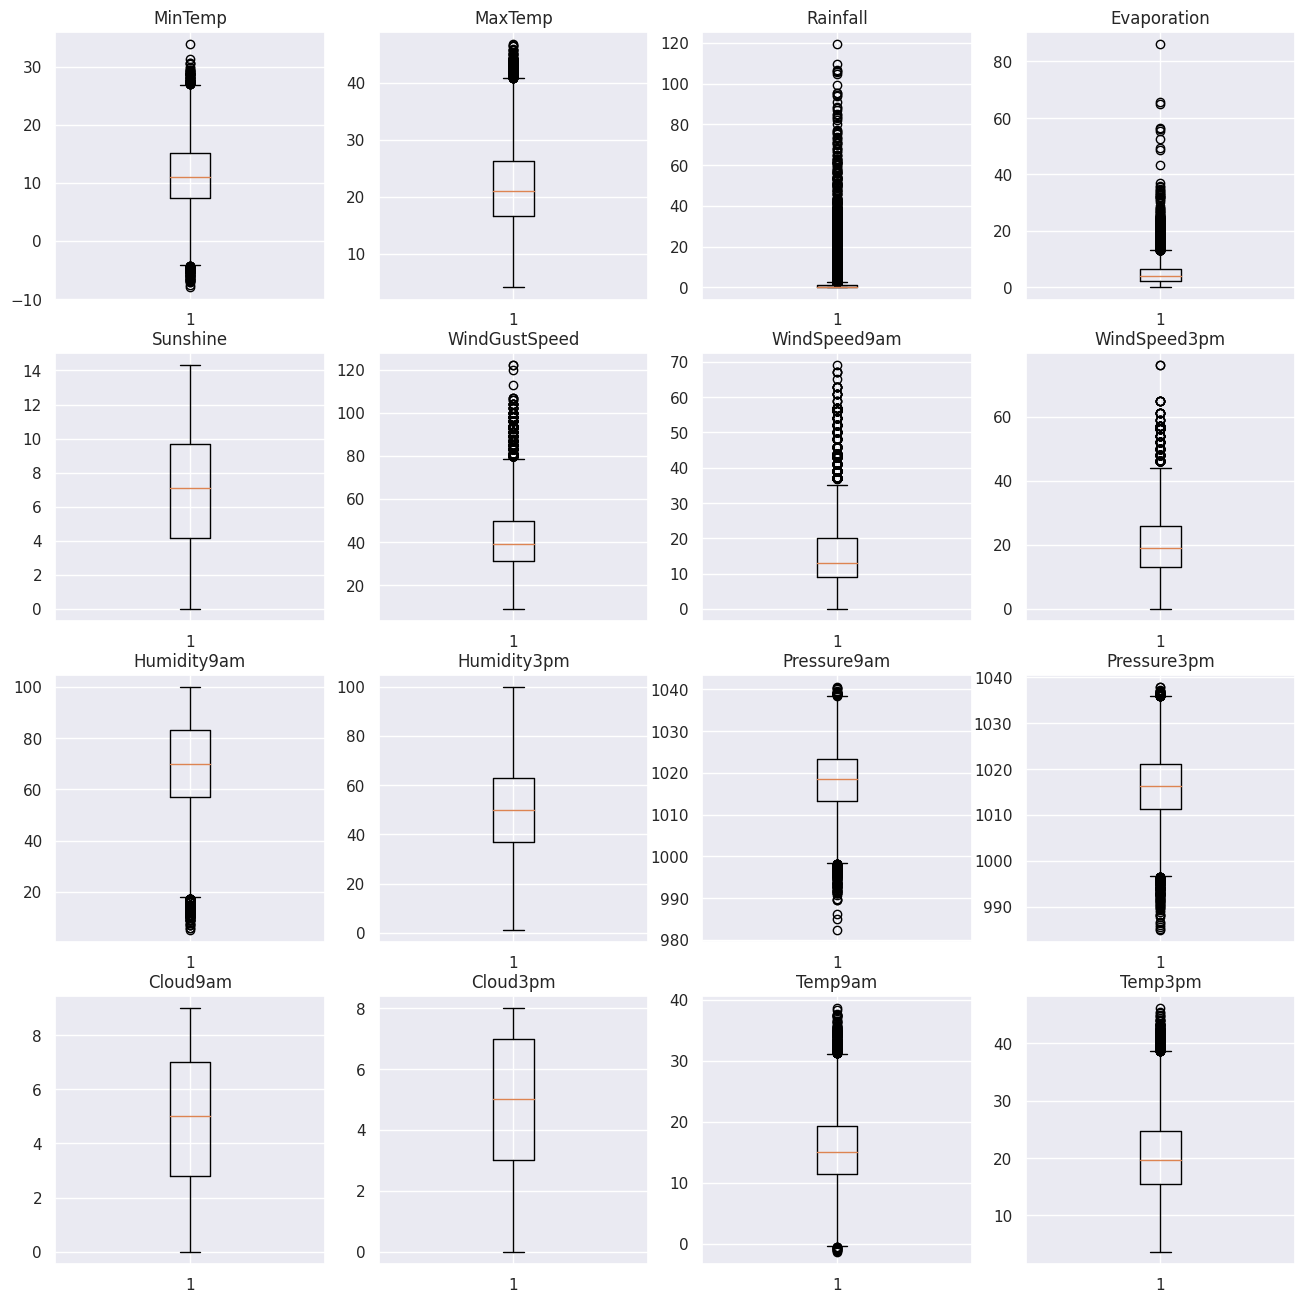

In [485]:
plt.figure(figsize=(16, 16))

for idx, col in enumerate(df_filtrado_numerico.columns[0:16], start=1):
    plt.subplot(4, 4, idx)
    plt.boxplot(df_filtrado[col])
    plt.title(col)

La lluvia depende de tres factores: la presion atmosferica, la temperatura y la humedad.

Vamos a ver las variables que nos interesan por localidad

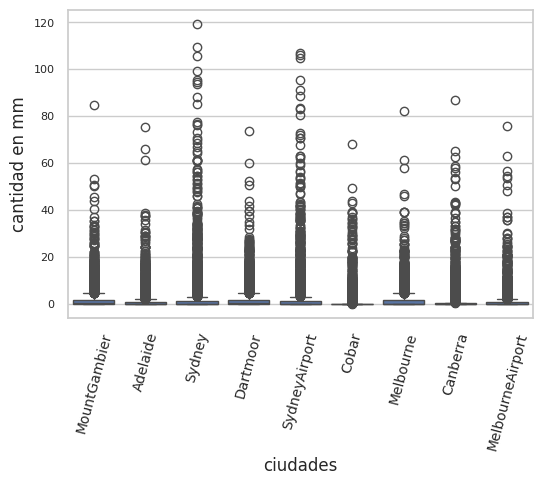

In [486]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=8)
sns.boxplot(x='Location', y='Rainfall', data=df_filtrado)
plt.title('')
plt.xlabel('ciudades')
plt.ylabel('cantidad en mm')
plt.show()

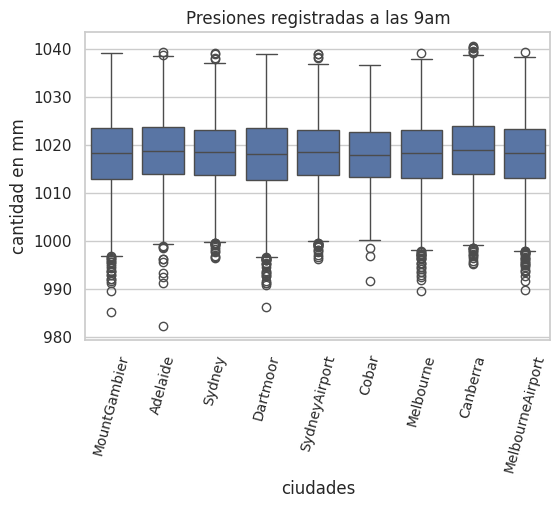

In [487]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
plt.xticks(rotation=75, fontsize=10)
sns.boxplot(x='Location', y='Pressure9am', data=df_filtrado)
plt.title('Presiones registradas a las 9am')
plt.xlabel('ciudades')
plt.ylabel('cantidad en mm')
plt.show()

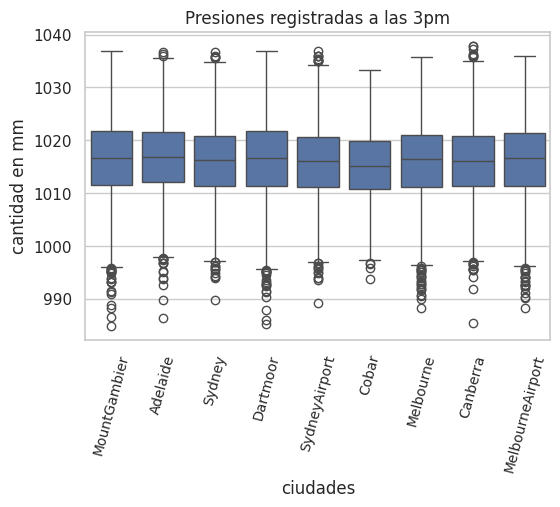

In [488]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
plt.xticks(rotation=75, fontsize=10)
sns.boxplot(x='Location', y='Pressure3pm', data=df_filtrado)
plt.title('Presiones registradas a las 3pm')
plt.xlabel('ciudades')
plt.ylabel('cantidad en mm')
plt.show()

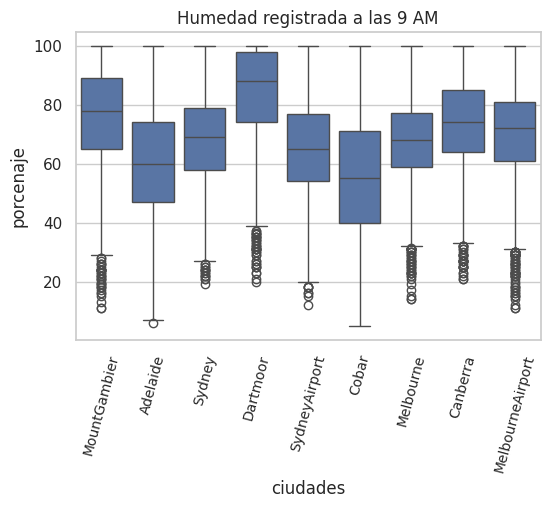

In [489]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
plt.xticks(rotation=75, fontsize=10)
sns.boxplot(x='Location', y= 'Humidity9am', data=df_filtrado)
plt.title('Humedad registrada a las 9 AM' )
plt.xlabel('ciudades')
plt.ylabel('porcenaje')
plt.show()

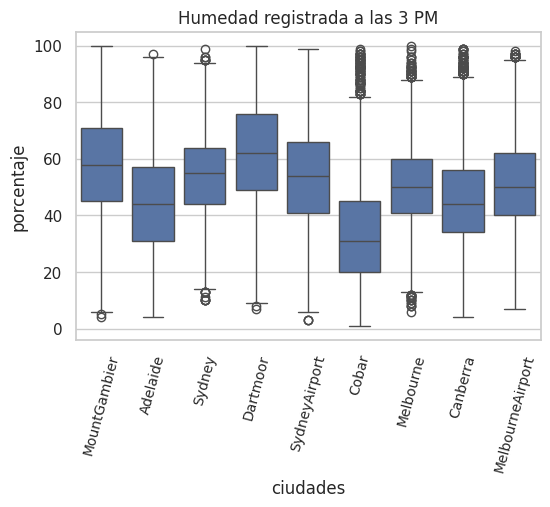

In [490]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
plt.xticks(rotation=75, fontsize=10)
sns.boxplot(x='Location', y='Humidity3pm', data=df_filtrado)
plt.title('Humedad registrada a las 3 PM')
plt.xlabel('ciudades')
plt.ylabel('porcentaje')
plt.show()

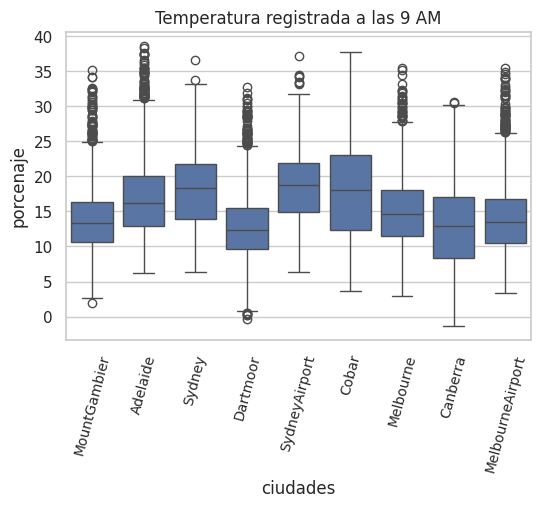

In [491]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
plt.xticks(rotation=75, fontsize=10)
sns.boxplot(x='Location', y= 'Temp9am', data=df_filtrado)
plt.title('Temperatura registrada a las 9 AM' )
plt.xlabel('ciudades')
plt.ylabel('porcenaje')
plt.show()

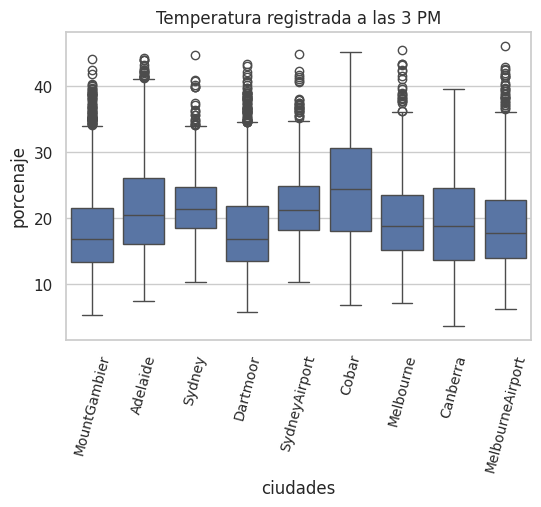

In [492]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
plt.xticks(rotation=75, fontsize=10)
sns.boxplot(x='Location', y= 'Temp3pm', data=df_filtrado)
plt.title('Temperatura registrada a las 3 PM' )
plt.xlabel('ciudades')
plt.ylabel('porcenaje')
plt.show()

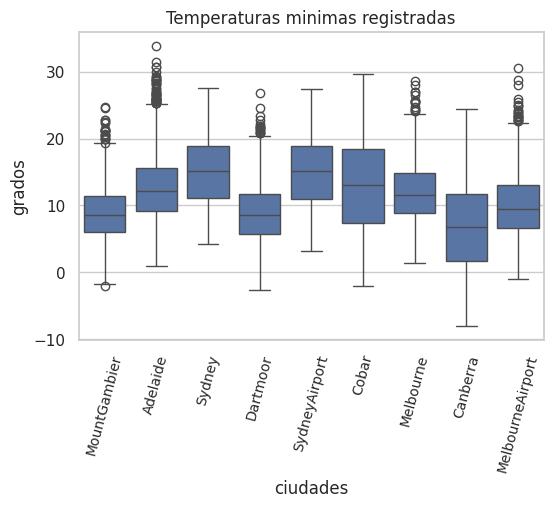

In [493]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
plt.xticks(rotation=75, fontsize=10)
sns.boxplot(x='Location', y= 'MinTemp', data=df_filtrado)
plt.title('Temperaturas minimas registradas')
plt.xlabel('ciudades')
plt.ylabel('grados')
plt.show()

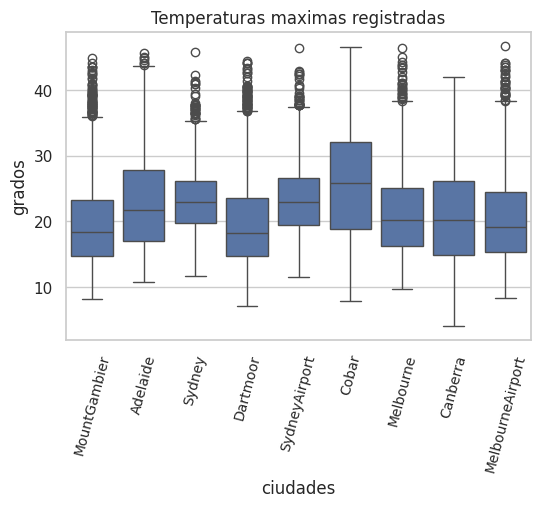

In [494]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
plt.xticks(rotation=75, fontsize=10)
sns.boxplot(x='Location', y= 'MaxTemp', data=df_filtrado)
plt.title('Temperaturas maximas registradas')
plt.xlabel('ciudades')
plt.ylabel('grados')
plt.show()

Decidimos mantener los outliers ya que consideramos que pueden ser casos atipicos puesto que al disciminarlos por ciudad estan presentes en la mayoria.

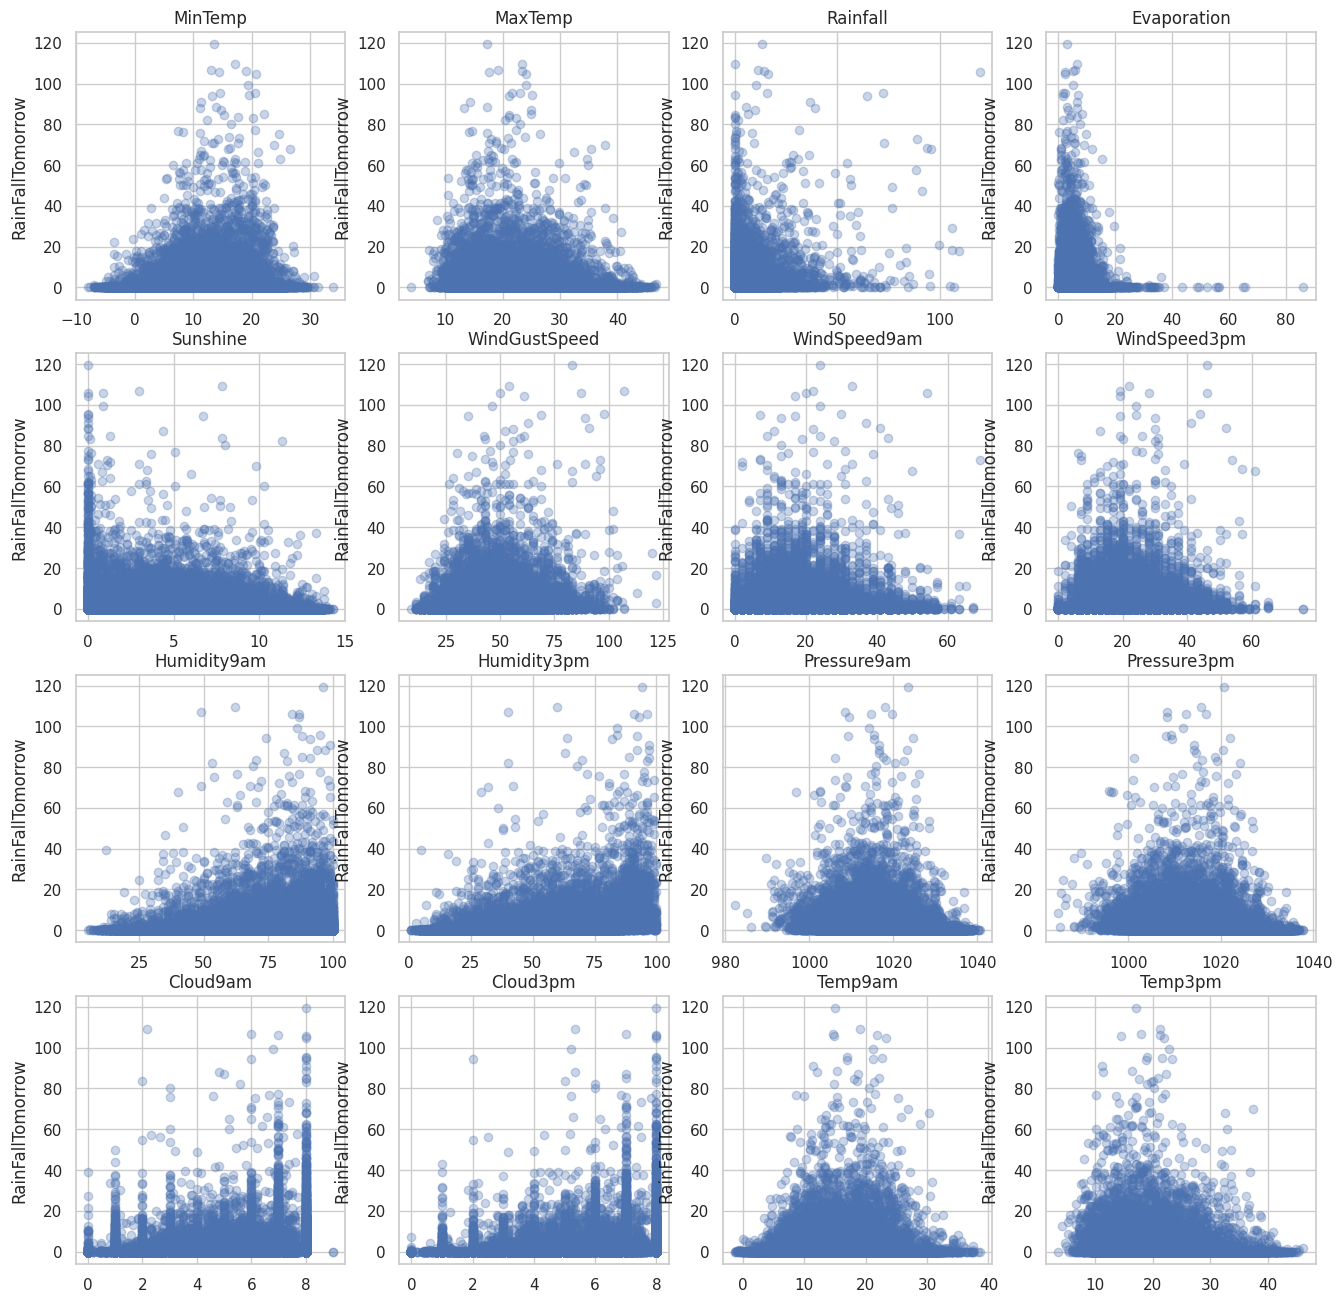

In [495]:
plt.figure(figsize=(16, 16))

for idx, col in enumerate(df_filtrado_numerico.columns[0:16], start=1):
    plt.subplot(4, 4, idx)
    plt.ylabel('RainFallTomorrow')
    plt.scatter(data=df_filtrado, x=col, y='RainfallTomorrow', alpha=.3)
    plt.title(col)

## Matriz de correlacion

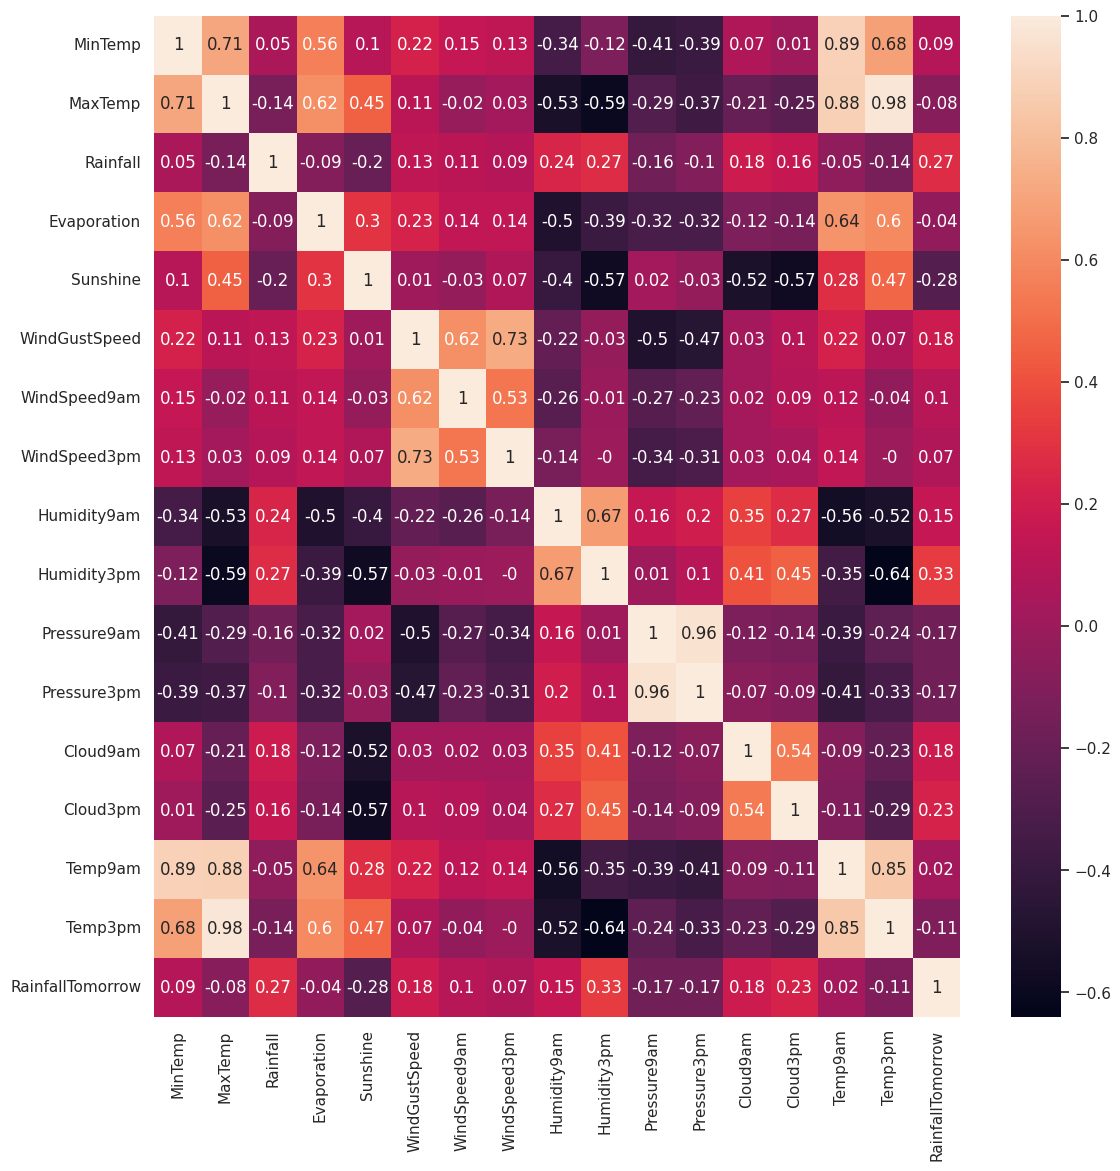

In [496]:
corr = df_filtrado.drop('WindGustDir', axis=1)\
           .drop('Date', axis = 1)\
           .drop('Location', axis = 1)\
           .drop('WindDir9am', axis = 1)\
           .drop('WindDir3pm', axis = 1)\
           .drop('RainToday', axis = 1)\
           .drop('RainTomorrow', axis = 1)\
           .drop('season', axis = 1)\
           .corr().round(2)

plt.figure(figsize = (13,13   ))
sns.heatmap(corr, annot=True)
plt.show()

## Codificacion de variables categoricas

In [497]:
df_train['WindGustDir'].unique()

array(['SW', 'S', 'SSW', 'W', 'SSE', 'E', 'SE', 'NE', 'NNE', 'WSW', 'WNW',
       'NW', 'N', 'ESE', 'ENE', 'NNW'], dtype=object)

In [498]:
df_train_codificado = codificar_variables(df_train)

In [499]:
df_train_codificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21657 entries, 0 to 21656
Data columns (total 79 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       21657 non-null  datetime64[ns]
 1   MinTemp                    21657 non-null  float64       
 2   MaxTemp                    21657 non-null  float64       
 3   Rainfall                   21657 non-null  float64       
 4   Evaporation                21657 non-null  float64       
 5   Sunshine                   21657 non-null  float64       
 6   WindGustDir                21657 non-null  object        
 7   WindGustSpeed              21657 non-null  float64       
 8   WindDir9am                 21657 non-null  object        
 9   WindDir3pm                 21657 non-null  object        
 10  WindSpeed9am               21657 non-null  float64       
 11  WindSpeed3pm               21657 non-null  float64       
 12  Humi

In [500]:
df_test_codificado = codificar_variables(df_test)

In [501]:
df_test_codificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5415 entries, 21657 to 27071
Data columns (total 79 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       5415 non-null   datetime64[ns]
 1   MinTemp                    5415 non-null   float64       
 2   MaxTemp                    5415 non-null   float64       
 3   Rainfall                   5415 non-null   float64       
 4   Evaporation                5415 non-null   float64       
 5   Sunshine                   5415 non-null   float64       
 6   WindGustDir                5415 non-null   object        
 7   WindGustSpeed              5415 non-null   float64       
 8   WindDir9am                 5415 non-null   object        
 9   WindDir3pm                 5415 non-null   object        
 10  WindSpeed9am               5415 non-null   float64       
 11  WindSpeed3pm               5415 non-null   float64       
 12  H

In [502]:
df_train_codificado = df_train_codificado.drop(columns= ['Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [503]:
df_test_codificado = df_test_codificado.drop(columns= ['Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

**VALIDACION TRAIN-TEST**

In [504]:
# Dividir el conjunto de datos de entrenamiento en características (X) y variables objetivo (y)
X_train_regresion = df_train_codificado.drop(columns=['RainfallTomorrow'])
X_train_clasificacion = df_train_codificado.drop(columns=['RainTomorrow_Yes'])

y_train_rainfall_tomorrow = df_train_codificado['RainfallTomorrow']
y_train_rain_tomorrow = df_train_codificado['RainTomorrow_Yes']

In [505]:
# Dividir el conjunto de datos de test en características (X) y variables objetivo (y)
X_test_regresion = df_test_codificado.drop(columns=['RainfallTomorrow'])
X_test_clasificacion = df_test_codificado.drop(columns=['RainTomorrow_Yes'])

y_test_rain_tomorrow = df_test_codificado['RainTomorrow_Yes']
y_test_rainfall_tomorrow = df_test_codificado['RainfallTomorrow']

## Estandarizacion

In [506]:
scaler = RobustScaler()
X_train_scaled=scaler.fit_transform(X_train_regresion)
X_test_scaled=scaler.transform(X_test_regresion)

y_train_scaled = scaler.fit_transform(y_train_rainfall_tomorrow.values.reshape(-1,1))
y_test_scaled = scaler.fit_transform(y_test_rainfall_tomorrow.values.reshape(-1,1))

In [507]:
X_train_scaled

array([[ 0.24675325, -0.4       ,  0.8       , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.80519481,  0.22105263,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.46315789,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.23376623,  0.47368421,  2.2       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.88311688,  0.83157895,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.1038961 , -0.31578947,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [508]:
X_train_regresion

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,season_Summer,season_Winter,Location_Canberra,Location_Cobar,Location_Dartmoor,Location_Melbourne,Location_MelbourneAirport,Location_MountGambier,Location_Sydney,Location_SydneyAirport
0,12.60,17.0000,0.8,4.800000,6.500000,56.000000,28.000,35.0,66.0,43.000,...,True,False,False,False,False,False,False,True,False,False
1,16.90,22.9000,0.0,7.875000,10.900000,50.000000,17.000,20.0,58.0,40.000,...,True,False,False,False,False,False,False,False,False,False
2,18.40,34.7000,0.0,9.800000,12.900000,61.285714,11.000,17.0,73.0,22.000,...,True,False,False,False,False,False,False,False,True,False
3,15.25,26.5375,0.1,4.800000,6.500000,61.285714,21.125,31.5,55.0,28.875,...,True,False,False,False,True,False,False,False,False,False
4,17.70,35.1000,0.0,9.800000,12.900000,72.000000,15.000,33.0,63.0,13.000,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21652,15.00,28.0000,0.0,6.714286,7.566667,22.000000,7.000,11.0,73.0,22.000,...,False,False,False,False,False,False,False,False,False,False
21653,12.80,27.7000,3.8,3.600000,12.000000,43.000000,20.000,20.0,64.0,34.000,...,False,False,False,False,True,False,False,False,False,False
21654,8.90,25.3000,2.2,7.200000,5.400000,57.000000,9.000,13.0,78.0,60.000,...,False,False,True,False,False,False,False,False,False,False
21655,17.50,28.7000,0.0,7.800000,9.000000,56.000000,15.000,35.0,63.0,54.000,...,False,False,False,False,False,False,False,False,False,True


Utilizamos RobustScaler porque es menos sensible a los valores atipicos.

## Regresion Lineal

In [509]:
def metricas(y_test, y_pred):
    print('R2:   %.2f' % r2_score(y_test, y_pred))
    print('MSE:  %.2f' % mean_squared_error(y_test, y_pred))
    print('MAE:  %.2f' % mean_absolute_error(y_test, y_pred))
    print('MAPE: %.2f' % mean_absolute_percentage_error(y_test, y_pred))

In [510]:
def gradient_descent(X_train, y_train, X_test, y_test, lr, epochs):

    n = X_train.shape[0]
    m = X_train.shape[1]

    o = X_test.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((o, 1)), X_test))


    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for i in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W)
        error_train = y_train - prediction_train
        #print(error_train)
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_test, W)
        error_test = y_test - prediction_test
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    # Graficar errores de entrenamiento y prueba
    # Definir una figura
    plt.figure(figsize=(12, 6))
    # Plotear errores de entrenamiento
    plt.plot(train_errors, label='Error de entrenamiento')
    # Plotear errores de prueba
    plt.plot(test_errors, label='Error de test')
    # Poner labels en los ejes
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    # Activar la leyenda
    plt.legend()
    # Poner titulo
    plt.title('Error de entrenamiento y prueba vs iteraciones (GD)')
    # Terminar y mostrar gráfico
    plt.show()

    return W

In [511]:
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr, epochs):

    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(n):
            # Obtener una muestra aleatoria de un solo dato para hacer SGD
            x_sample = X_train[j]
            y_sample = y_train[j][0]

            prediction = np.matmul(x_sample, W)
            error = y_sample - prediction
            train_mse = error ** 2
            train_errors.append(train_mse)

            gradient = -2 * error * x_sample.T.reshape(-1, 1)

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (SGD)')
    plt.show()

    return W

In [512]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr, epochs, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):

        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]


        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

In [513]:
regresion = LinearRegression()
regresion.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [514]:
y_pred_regresion = regresion.predict(X_test_scaled)

metricas(y_test_scaled, y_pred_regresion)

R2:   0.38
MSE:  28.10
MAE:  2.26
MAPE: 2296498139488823.50


 R2 nos da 0.38, es decir que solo pueden llegar a explicar un 38% de la variabilidad de los datos.

 MSE es similar a la medida estadística de varianza que nos permite medir la incertidumbre alrededor de nuestro más probable pronóstico.En nuestro caso es de 28.10, por lo tanto la incertidumbre en el resultado es de 28,1 mm.

 El error absoluto medio(MAE) es una medida común del error de pronóstico en análisis de series de tiempo, nos da 2,26.

 El MAPE proporciona una medida relativa de qué tan cerca o lejos está el pronóstico de los valores reales. Cuanto menor sea el MAPE, mejor será la precisión del pronóstico,
 puede verse afectado por valores atípicos o cuando hay divisiones por cero en el cálculo. Además, puede interpretarse incorrectamente si el valor real es igual a cero o cercano a cero.En nuestro caso, esta afectado por los valores atipicos, no es una medida que nos brinde informacion de utilidad.

In [515]:
print(regresion.coef_)

[[-4.14541176e-01  9.26131833e-01  1.23822833e-01 -4.66612936e-02
  -5.81472209e-01  8.48634287e-01  1.04704825e-01 -3.90624283e-01
  -2.20036963e-01  1.56621567e+00  2.65359345e+00 -2.75725620e+00
  -1.35998281e-01  4.04254792e-02  6.94475909e-02 -1.16950016e-01
  -7.11839609e-02  2.24357693e-01  2.92167517e-01  3.03876901e-01
   5.57691809e-01 -2.42469030e-03  6.59029392e-02  5.04464220e-01
   3.11220325e-01 -2.49581776e-01  3.06307521e-01  2.51856638e-01
   6.72258539e-01  8.02926874e-01  1.11200185e-02  9.13507514e-01
   1.03883419e+00 -7.25565266e-01  8.85398100e-01  6.37773761e-01
  -7.73262635e-02 -3.53642191e-03  6.09426021e-01 -5.49225114e-01
  -1.27380090e-01  4.15900883e-01 -1.20743674e-01  1.36605242e-01
   4.03352478e-01  5.60915737e-02 -1.19674334e-01  4.89742782e-02
  -3.86374300e-02  7.99555153e-02 -2.04368295e-02 -2.39744461e-01
   1.04126846e-01  1.11337823e-01 -2.31670699e-01  6.28547249e-01
   9.36384014e-01 -1.42274674e-01  1.66444085e-01  6.22599906e-01
  -2.32457

## Gradiente Descendiente

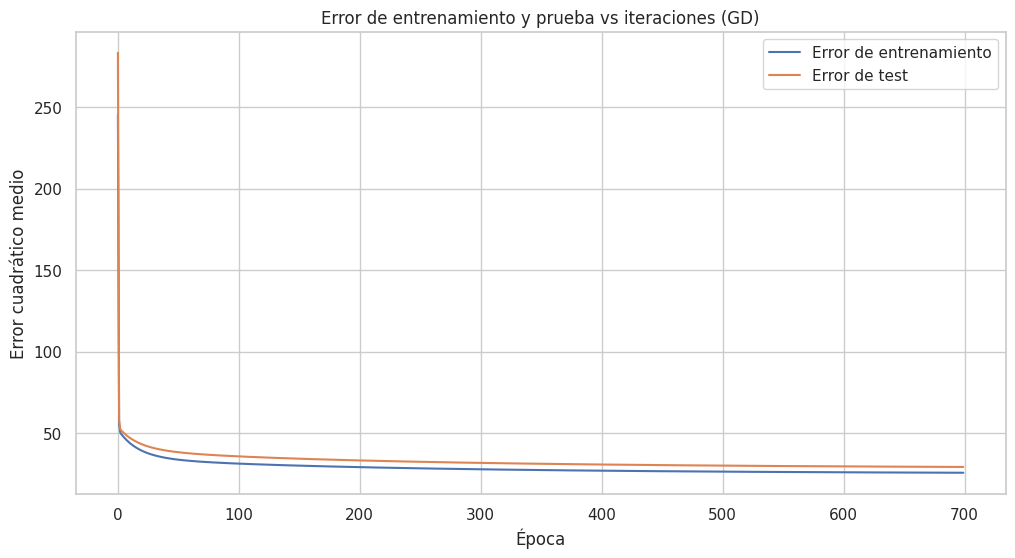

array([[ 1.17475760e+00],
       [ 6.40730970e-03],
       [-2.12649798e-01],
       [ 1.30323152e-01],
       [-8.00120129e-02],
       [-3.95013102e-01],
       [ 1.06895154e+00],
       [-1.53114734e-01],
       [-5.34174136e-01],
       [ 8.30393774e-02],
       [ 1.15422434e+00],
       [ 3.02087643e-01],
       [-5.59723867e-01],
       [-1.89114425e-01],
       [ 1.86260353e-01],
       [ 7.73872145e-01],
       [-2.34955217e-01],
       [-9.55400119e-01],
       [-1.36774034e-01],
       [ 7.87274027e-02],
       [-3.74950826e-02],
       [-2.18715766e-01],
       [-4.43195590e-01],
       [-2.95336224e-01],
       [ 3.65901365e-01],
       [ 3.74405579e-01],
       [ 6.27872442e-04],
       [-4.23784625e-01],
       [-8.36124346e-02],
       [-5.17834045e-02],
       [-3.48523300e-04],
       [ 2.42840831e-01],
       [ 1.78587106e+00],
       [ 5.47367614e-01],
       [-1.19379784e-01],
       [ 5.42561532e-01],
       [ 6.91052999e-01],
       [-5.58904252e-01],
       [ 1.6

In [516]:
gradient_descent(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, lr=0.01, epochs=700)

Con este algoritmo de optimizacion el MSE de test coincide con el MSE de la Regresion lineal para la prediccion.Necesita 700 iteraciones para encontrarlo, con un lr de 0.01

### Gradiente Descendiente Estocastico

In [517]:
gradiente = SGDRegressor()
gradiente.fit(X_train_scaled, y_train_scaled)

SGDRegressor()

In [518]:
y_pred_gradiente = gradiente.predict(X_test_scaled)

metricas(y_test_scaled, y_pred_gradiente)

R2:   0.21
MSE:  35.79
MAE:  2.41
MAPE: 2475524332946302.00


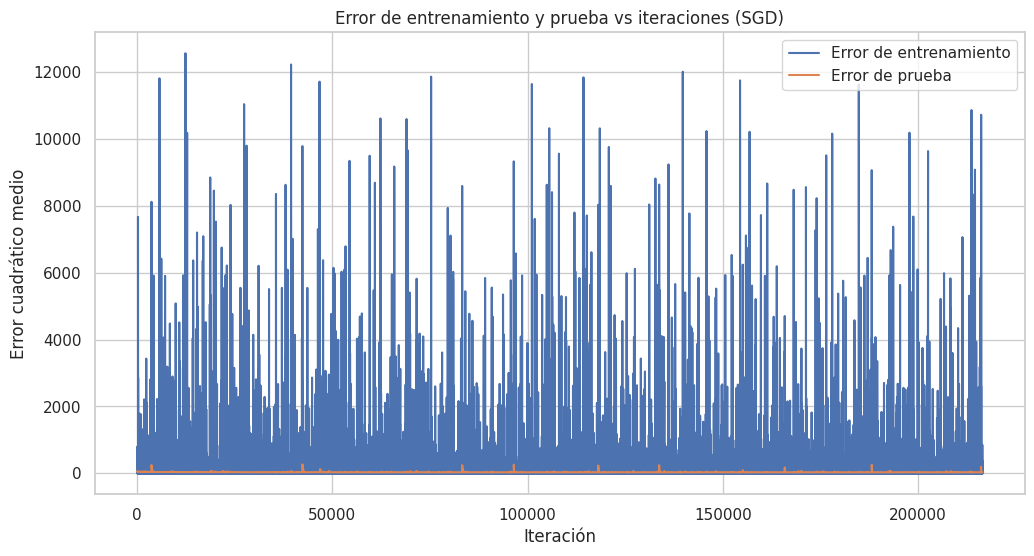

array([[-1.01799974e+00],
       [-3.41509296e-01],
       [ 7.01876669e-01],
       [ 7.59472439e-02],
       [-8.95316760e-02],
       [-6.20123540e-01],
       [ 8.50099691e-01],
       [ 2.77040477e-02],
       [-3.66371363e-01],
       [-4.13164099e-01],
       [ 1.65704635e+00],
       [ 1.50563549e+00],
       [-1.62883005e+00],
       [-1.29911711e-01],
       [ 2.95547591e-03],
       [-2.84909541e-01],
       [ 5.53362093e-01],
       [-4.84850776e-02],
       [-4.19123266e-02],
       [ 7.56569228e-01],
       [ 2.48614625e-01],
       [ 3.96005054e-01],
       [ 6.99388268e-01],
       [ 6.38805284e-02],
       [ 2.92635395e-01],
       [ 9.01077925e-01],
       [-2.11267532e-01],
       [ 1.18788879e-01],
       [ 8.03931628e-01],
       [ 4.68454803e-01],
       [ 6.45788583e-01],
       [ 7.95496714e-01],
       [ 1.09708832e+00],
       [ 6.69742396e-01],
       [ 7.72093244e-02],
       [ 5.86038751e-01],
       [ 4.04930909e-01],
       [ 8.77653690e-01],
       [-1.4

In [560]:
stochastic_gradient_descent(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, lr=0.0001, epochs=10)

### Gradiente Descendiente (Mini_batch)

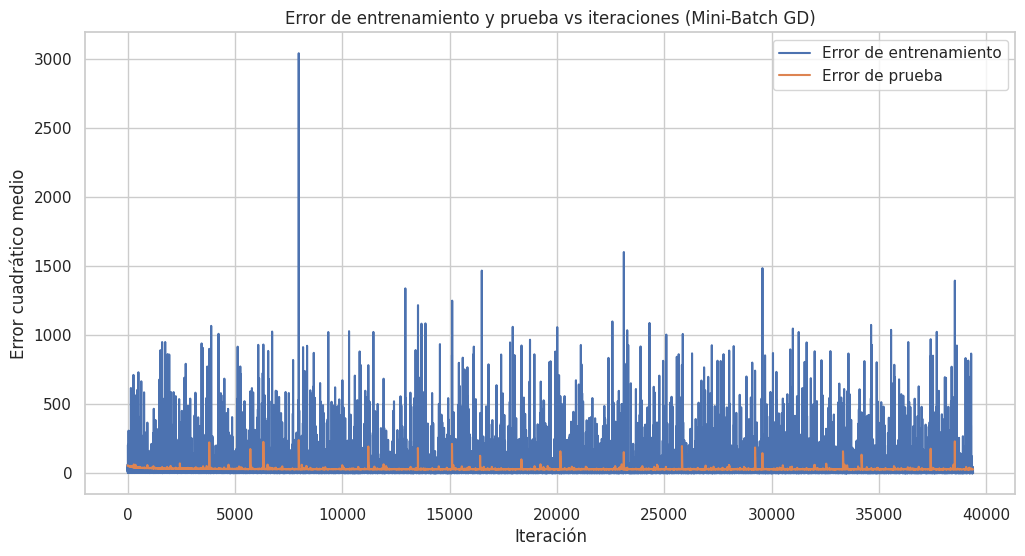

array([[ 0.32902928],
       [-0.66248343],
       [ 0.92820763],
       [ 0.07900884],
       [-0.05525914],
       [-0.55211966],
       [ 0.83693182],
       [ 0.10073355],
       [-0.4210933 ],
       [-0.2192598 ],
       [ 1.46825176],
       [ 1.73577414],
       [-1.86271697],
       [-0.12590033],
       [-0.01698193],
       [ 0.14811289],
       [-0.01577767],
       [-0.02507021],
       [-0.33830378],
       [ 0.18060826],
       [ 0.4378328 ],
       [-0.00864914],
       [-0.12388006],
       [ 0.15853607],
       [-0.08297192],
       [ 0.17295095],
       [-0.2213546 ],
       [-0.22010878],
       [ 0.10059024],
       [ 0.80267982],
       [ 0.17661764],
       [-0.09857944],
       [ 1.2059448 ],
       [ 0.5215658 ],
       [-0.96102671],
       [ 1.01656638],
       [ 0.09721803],
       [-0.19092101],
       [ 0.52187827],
       [ 0.05504685],
       [-0.87801743],
       [ 0.19428358],
       [-0.068615  ],
       [-0.26625334],
       [ 0.1498718 ],
       [-0

In [554]:
mini_batch_gradient_descent(X_train_scaled, y_train_scaled,\
                            X_test_scaled, y_test_scaled,lr=0.001,\
                            epochs=20)


Con Gradiente descendiente(mini_batch) en 20 epocas, el error de test llega a su nivel mas bajo con lr = 0.001, convergiendo mas rapido que SG.

## Metodos de regularizacion

## Ridge

In [521]:
ridge = RidgeCV()
ridge.fit(X_train_scaled, y_train_scaled)

RidgeCV()

In [522]:
y_pred_ridge = ridge.predict(X_test_scaled)

metricas(y_test_scaled, y_pred_ridge)

R2:   0.38
MSE:  28.11
MAE:  2.26
MAPE: 2280228002358931.00


In [523]:
print("\nCoeficientes del modelo Ridge:")
print(ridge.coef_)


Coeficientes del modelo Ridge:
[[-4.16640990e-01  8.83694732e-01  1.23857594e-01 -4.80661767e-02
  -5.84910803e-01  8.49731761e-01  1.01094574e-01 -3.91503022e-01
  -2.24781576e-01  1.56958194e+00  2.54272592e+00 -2.65122910e+00
  -1.34276826e-01  4.23654337e-02  5.47185412e-02 -5.54424072e-02
  -1.08565407e-01  1.65559849e-01  2.97663926e-01  2.64011508e-01
   4.98143454e-01  1.57698744e-02  2.85112991e-02  4.45094817e-01
   3.22182217e-01 -2.82875649e-01  2.52863779e-01  2.53341694e-01
   6.28744489e-01  7.43000759e-01  3.29498301e-02  8.64311532e-01
   9.76278258e-01 -6.85245923e-01  8.36045994e-01  5.81995894e-01
  -4.99843750e-02 -3.99350869e-02  5.51889467e-01 -5.11754807e-01
  -1.57149409e-01  3.65261400e-01 -8.91585334e-02  9.89335512e-02
   3.43427791e-01  6.14762495e-02 -1.52135840e-01 -1.60345131e-03
  -3.52816713e-02  4.93205569e-02 -6.73456363e-02 -2.31211294e-01
   7.36306878e-02  6.47569626e-02 -2.07609173e-01  5.84400772e-01
   8.73688184e-01 -1.09775994e-01  1.2718853

In [524]:
print("Ridge_Score df_train:", ridge.score(X_train_scaled, y_train_scaled))
print("Ridge_Score df_test:", ridge.score(X_test_scaled, y_test_scaled))

Ridge_Score df_train: 0.3526381101105577
Ridge_Score df_test: 0.37719017094654284


## Lasso

In [525]:
lasso = LassoCV()
lasso.fit(X_train_scaled, y_train_scaled)

LassoCV()

In [526]:
y_pred_lasso = lasso.predict(X_test_scaled)

metricas(y_test_scaled, y_pred_lasso)

R2:   0.37
MSE:  28.27
MAE:  2.17
MAPE: 1967722963585285.25


In [527]:
print("\nCoeficientes del modelo Lasso:")
print(lasso.coef_)



Coeficientes del modelo Lasso:
[-0.17442672  0.70936769  0.12573941 -0.         -0.54625909  0.74134024
  0.0540555  -0.35404655 -0.19527073  1.39767742  1.85987405 -1.92927138
 -0.04916977  0.          0.          0.         -0.03603293 -0.04060052
  0.          0.14457943  0.03091934  0.          0.          0.
  0.10984655 -0.22378149 -0.          0.          0.43774602  0.25361526
  0.          0.51421639  0.39262487 -0.20512873  0.55666145  0.0891974
  0.         -0.          0.         -0.09373382 -0.00730228 -0.
  0.          0.         -0.         -0.         -0.07323626 -0.1574742
 -0.         -0.         -0.20805824 -0.05785472 -0.         -0.21485242
 -0.          0.30517241  0.31141222  0.          0.          0.
  0.         -0.26548481  6.38308293 -0.04084705  0.08273177 -0.12615867
  0.15843004  0.15644126 -0.61662794 -0.         -0.39845568 -0.47772317
  0.48505521  0.22433686]


In [528]:
print("Lasso_Score df_train:", lasso.score(X_train_scaled, y_train_scaled))
print("Lasso_Score df_test:", lasso.score(X_test_scaled, y_test_scaled))

Lasso_Score df_train: 0.34999514340543203
Lasso_Score df_test: 0.3736352243437976


### ElasticNet

In [529]:
elastic = ElasticNetCV()
elastic.fit(X_train_scaled, y_train_scaled)

ElasticNetCV()

In [530]:
y_pred_elastic = elastic.predict(X_test_scaled)

metricas(y_test_scaled, y_pred_elastic)

R2:   0.37
MSE:  28.51
MAE:  2.15
MAPE: 1938367884907566.00


In [531]:
print("\nCoeficientes del modelo ElasticNet:")
print(elastic.coef_)


Coeficientes del modelo ElasticNet:
[-1.56660165e-01  5.67041752e-01  1.27335763e-01 -7.49986003e-03
 -5.96086634e-01  7.43538636e-01  2.91776899e-02 -3.55634805e-01
 -1.75443465e-01  1.37827348e+00  1.10935332e+00 -1.23995533e+00
 -4.84805965e-02  2.43419756e-02  0.00000000e+00  1.62060371e-01
 -1.19234424e-01 -9.37579977e-02  0.00000000e+00  5.48001746e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  4.53829925e-02 -2.59350150e-01 -0.00000000e+00  0.00000000e+00
  3.20420095e-01  2.17466850e-01  0.00000000e+00  3.87724930e-01
  3.50165426e-01 -1.10354796e-01  4.00818619e-01  1.14603882e-01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.54034578e-03
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -5.61423741e-02 -9.14001766e-02 -1.61116952e-01
 -2.07711666e-02 -0.00000000e+00 -1.92603044e-01 -3.54804786e-02
 -0.00000000e+00 -1.65474610e-01 -0.00000000e+00  2.24278805e-01
  2.70459713e-01  0.00000000e+00  0.00000000e+00  0.0

In [532]:
print("ElasticNet_Score df_train:", elastic.score(X_train_scaled, y_train_scaled))
print("ElasticNet_Score df_test:", elastic.score(X_test_scaled, y_test_scaled))

ElasticNet_Score df_train: 0.34732088838937625
ElasticNet_Score df_test: 0.3684621353076276


De los cuatro modelos lineales que probamos vemos que la regresion lineal y Ridge nos dan un R2 de aproximadamente 0.38, es decir que solo pueden llegar a explicar un 38% de la variabilidad de los datos.

En todos los casos el score de test nos da levemente mejor que el de train,podemos asegurar que no esta sobrejustado.